Univerza v Ljubljani

Fakulteta za matematiko in fiziko

<br>
<br>

#### Tim Kalan in Sara Papež
# Poti v kvadratu


<br>
<br>


#####  Finančni praktikum
#####  Mentorja: prof. dr. Sergio Cabello in asist. dr. Janoš Vidali  


<br>
<br>

## Navodila za delo

Consider a set P of n points in the unit square. Make a graph with vertex set P and connecting any two points of P that are at distance at most r, where r is a parameter. Consider a shortest path tree in the graph from one of the points of P selected at random; the starting point is called the root. How does the length of the shortest path tree change as n and/or r changes? How does the sum of the distances from the root to all other vertices change? You may consider it also in 3D.

<br>


## Opis problema

V enotskem kvadratu naključno 
generiramo $ n $ točk in jih zberemo v množico $ P $ . To množico nato proglasimo
za množico vozlišč $ V $ grafa $ G $ in povežemo vse točke, ki so ena od drugih oddaljene
manj od vnaprej podanega parametra je največ dovoljeno oddaljeno $ r $ . To nam da torej
graf $ G = (V, E) $ , kjer je $ E $ množica povezav, ki je odvisna od paramtera $ r $ . V
nadaljevanju se osredotočimo na računanje dreves najkrajših poti od naključno 
izbrane točke -  korena.
Jedro projekta leži v spreminjanju parametra $ r $ v številu točk $ n $ ter opazovanju
dogajanja.



**Opomba:** Zaradi preglednosti poročila so vse psevdokode v input celicah (z izjemo našega glavnega algortima) skrite z značko `remove_cell`. Če nas zanima psevdokoda za posamezni graf ali funkcijo  jo lahko odkrijemo oz. pogeldamo datoteko s končnico `.ipynb`, kjer so celice v celoti vidne.

<br>


## Algoritem 

### Opis



Najprej smo napisali funkcijo za izračun evklidske razdalje med dvema točkama. Funkcija deluje tudi v $R^n$. Glavni del oz. "možgani" najinega projekta pa so v razredu `Kvadrat`, v katerem so implementirane vse ključne funkcije:

1. generator naključnih točk,
2. generator bližnjih točk (glede na $r$),
3. algoritem za računanje drevesa najkrajših poti oz. Dijkstrov algoritem in
4. razne metode za vizualizacijo dobljenih rezultatov.

Za vizualizacijo sva uporabila paket `matplotlib`.

V nadaljevanju sva vse naštete funkcije opazovala tudi v treh dimenzijah; na enotski kocki. Razred `Kocka` si deli večino funkcionalnosti, le da se vse prestavi v tri dimenzije.


<br>

### Psevdokoda

1. Na začetek sodijo uvozi; potrebujemo paket `matplotlib` za vizualizacijo in paket 
    `random` za generiranje naključnih števil

In [1]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

2. Funkcija `razdalja` za izračun evklidske razdalje med dvema točkama.

In [2]:
def razdalja(tocka0, tocka1):
    razdalja = 0
    for i in range(len(tocka0)):
        dx = tocka0[i] - tocka1[i]
        razdalja += dx ** 2

    return razdalja ** (1/2)

3. Začetek razreda `Kvadrat` kjer določimo število točk v enotskem kvadratu (= `st_tock`) in maksimalno razdaljo med točkami (= `max_razdalja`). Generirane točke shranimo kot seznam naborov. x in y koordinati točk generiramo glede na enakomerno porazdelitev $U(0,1)$.

In [3]:
class Kvadrat:
    def __init__(self, st_tock, max_razdalja):
        self.st_tock = st_tock
        self.max_razdalja = max_razdalja
        tocke = []
        for _ in range(st_tock):
            x, y = random.uniform(0, 1), random.uniform(0, 1)
            tocke.append((x, y))
        self.tocke = tocke


4. Za pridobivanje vseh točk, ki so od našega korena oddaljene največ $r$ definiramo funkcijo `bliznje`. Funkcija se s `for` zanko zapelje čez vse točke in ustvari seznam naborov z imenom `ustrezne`, ki vsebuje točke, ki so dovolj blizu našega korena. V seznam pa ne doda točke same. Na koncu nam vrne slovar oblike `{točka: seznam točk, ki so dovolj blizu}`. To hkrati služi kot graf v obliki seznama sosedov. 

In [4]:
class Kvadrat:
 
    def bliznje(self):
        bliznje = dict()
        for koren in self.tocke:
            ustrezne = []   
            for sosed in self.tocke:
                if koren == sosed:
                    pass

                elif razdalja(koren, sosed) <= self.max_razdalja:
                    ustrezne.append(sosed)
            
            bliznje[koren] = ustrezne
        return bliznje

5. Začetno funkcijo `drevo_najkrajsih_poti_pocasi` (še vedno na voljo v `kvadra.py`) za izračun drevesa najkrajših poti od dane točke sva z uporabo prednostne vrste pohitrila in definirala funkcijo `drevo_najkrajsih_poti`. Na začetku za vsako točko dobimo njene sosede in jih shranimo v `seznam_sosedov`S tem se izognemo večratnemu klicu funkcije `bliznje`. V `koreni` za hip shranimo vse točke, ki so ključi v seznamu sosedov. To naredimo zato, da lahko preverimo ustrznost izbranega korena. Če je ustrezen, ga shranimo v `root` Zaradi naključne generacije točk, funkcija pri nastavljenem parametru vedno izbere ustrezen, a naključen koren. Nato definiramo Dijkstrov algoritem z uporabo prednostne vrste. Delovanje Dijkstrovega algoritma:
    * Ustvarimo si slovarja `oce`, ki hrani kazalec na očeta točke, in `oddaljenost`, ki beleži razdaljo od `root`.
    * Oddaljenost korena je seveda $0$, oddaljenost vseh ostalih točk pa nastavimo na $1000000$ - to je za naše namene praktično neskončno, očetje pa so zaenkrat `None`. 
    * V prednostno vrsto shranimo vse točke s prioriteto, ki je enaka oddaljenosti točke od korena.
    * Nato začnemo prazniti prednostno vrsto; na vsakem koraku izloćčmo točko, ki ima zabeleženo najmanjšo razdaljo do korena in pogledamo njene sosede.
    * Za vsakega soseda izračunamo novo razdaljo `alt` kot razdaljo do opazovane točke + razdaljo med opazovano točko in sosedom. 
    * Če je oddaljenost manjša od trenutne zabeležene, le-to posodobimo na `alt`, za očeta soseda nastavimo opazovano točko in v prednostno vrsto vrnemo soseda s posodobljeno prioriteto.
    * Ponavljamo, dokler prednostna vrsta ne ostane prazna.

In [5]:
class Kvadrat:

     def drevo_najkrajsih_poti(self, koren=0):
        seznam_sosedov = self.bliznje()

        koreni = list(seznam_sosedov.keys())

        try:
            root = koreni[koren]
            self.root = root         
        except IndexError as e:
            print("Premalo korenov!")
            print(e)
            
        Q = PriorityQueue()
        oddaljenost = dict()
        oce = dict()

        oddaljenost[root] = 0

        for vozlisce in seznam_sosedov:
            oce[vozlisce] = None
            if vozlisce != root:
                oddaljenost[vozlisce] = 1000000       

            prioriteta = oddaljenost.get(vozlisce)
            Q.put((prioriteta, vozlisce))

        while not Q.empty():
            dist, u = Q.get()    

            for sosed in seznam_sosedov[u]:
                alt = oddaljenost[u] + razdalja(u, sosed)
                if alt < oddaljenost[sosed]:
                    oddaljenost[sosed] = alt
                    oce[sosed] = u
                    Q.put((alt, sosed))

        return oddaljenost, oce

<br>
<br>

### Osnovni primer 

Osnovne vizualizacijske funkcionalnosti naše kode bomo po korakih prikazali na enotskem kvadratu 'demo'.

In [40]:
from koda.kvadrat import Kvadrat, Kocka
plt.rcParams['figure.figsize'] = [7, 7]


    
Kvadrat najprej nariše vseh $n = 100$ naključnih enakomerno porazdeljenih točk v enotskem kvadratu. Za maksimalno razdaljo smo vzeli $r = 0.3$. 

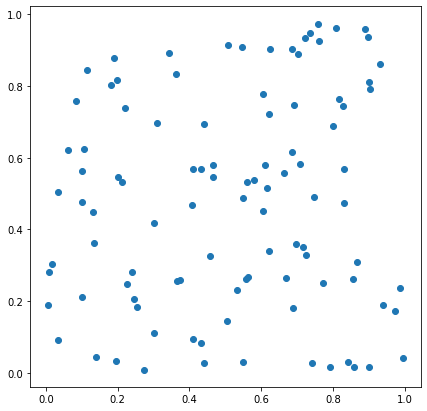

In [7]:
demo = Kvadrat(100, 0.3)
demo.narisi_tocke() 

Točke izbiramo kot zaporedne številke $0, \dots , n-1$. Ker so bile točke določene naključno, ni razloga, da ne bi za začetno točko izbrali kar prve točke; in sicer točke $0$. Ostale vizualizacije bodo tako vezane na to točko.

 `Kvadrat` nato z drugo barvo pobarva točke, ki so "dovolj blizu" dani točki. V našem primeru so to vse točke, ki so oddaljene za največ $0.3$. Nariše lahko tudi krožnico, ki nazorno ponazori $r$.

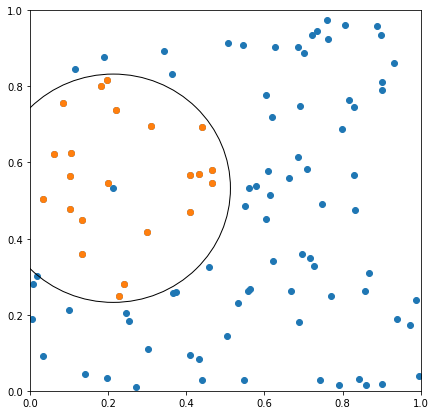

In [41]:
demo.narisi_tocke()
demo.narisi_bliznje(tocka=0)
demo.narisi_okolico(tocka=0)

Nato se lahko posvetimo našemu jedrnemu problemu - grafom. `Kvadrat` zna povezati vse bližnje točke z začetno točko $0$ - korenom.

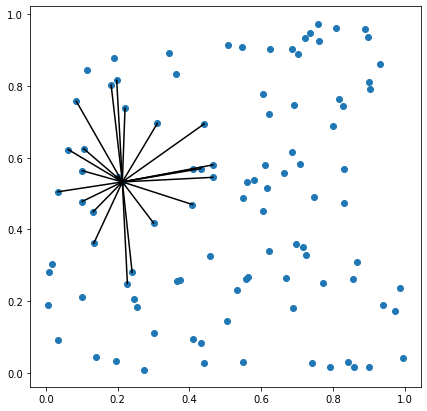

In [10]:
demo.narisi_tocke()
demo.narisi_graf_tocke(tocka=0)

Kvadrat zna seveda tudi narisati celoten graf, ki ga definirajo pravila - za vsako točko nariše graf točke.

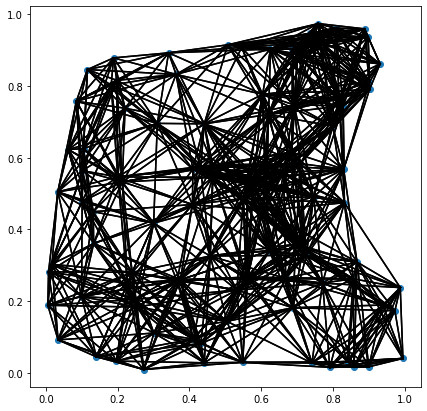

In [11]:
demo.narisi_tocke()
demo.narisi_graf()

Na koncu uporabimo Dijkstrov algoritem, da dobimo drevo najkrajših poti od nekega korena. Koren je označen z rdečo. Izberemo ga podobno kot začetno točko v prejšnjih primerih.

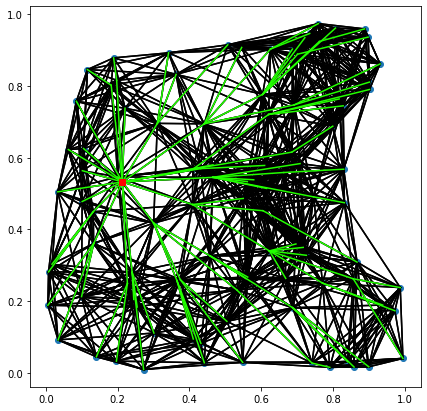

In [12]:
demo.narisi_tocke()
demo.narisi_graf()
demo.narisi_drevo(koren=0)

<br>
<br>

## Primeri 

 Pogledali smo si še štiri primere iz katerih je razvidno, da izbira parametrov (števila točk in maksimalna razdalja) močno vpliva na izgled grafa. Ker smo opazili, da se čas, ki ga program potrebuje za izris grafov pri različnih parametrih zelo razlikuje, smo nekaj besed posvetili tudi času izvajanja.


* V prvih dveh primerih smo si v enotskem kvadratu izbrali relativno majhno število naključnih točk ($n = 20$). Dobljena grafa smo primerjali glede na izbran parameter $r$. Pri prvem grafu smo za maksimalno razdaljo vzeli vrednost $0.1$, v drugem  pa vrednost $0.9$. 

    Čas ki ga je program porabil za izris grafov je minimalen; in sicer $295$ ms.

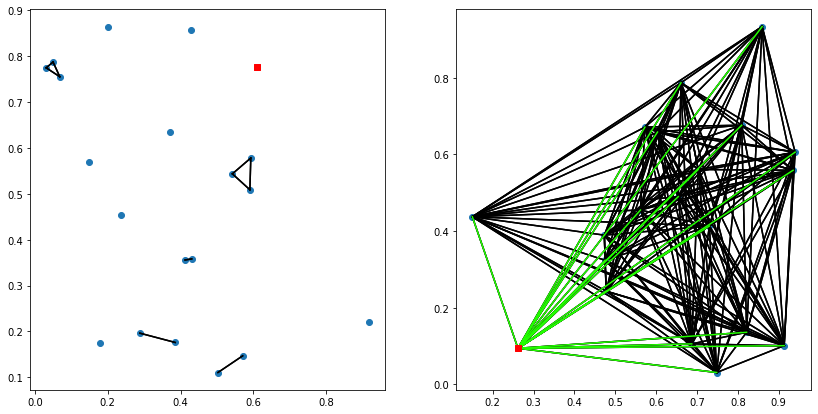

In [13]:
malo_kratke = Kvadrat(20, 0.1)
malo_dolge = Kvadrat(20, 0.9)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
malo_kratke.narisi_tocke()
malo_kratke.narisi_graf()
malo_kratke.narisi_drevo()

plt.subplot(1, 2, 2)
malo_dolge.narisi_tocke()
malo_dolge.narisi_graf()
malo_dolge.narisi_drevo()

* Nato  smo si izbrali večje število naključnih točk ($n =  300$). Enako kakor prej smo si v enem primeru izbrali  za parameter $r$ vrednost $0.1$, v drugem primeru pa le $r = 0.4$, saj je že s temi parametri program potreboval kar nekaj časa za izris grafa. 

    Porabljen čas je v primerjavi z zgornjima primeroma pričakovano veliko daljši; in sicer $1$ min $40$ s. Če za paramter $r$ vzamemo $0.9$, kakor v prejšnjem primeru, program potrebuje za izris več kot $2$ min. 


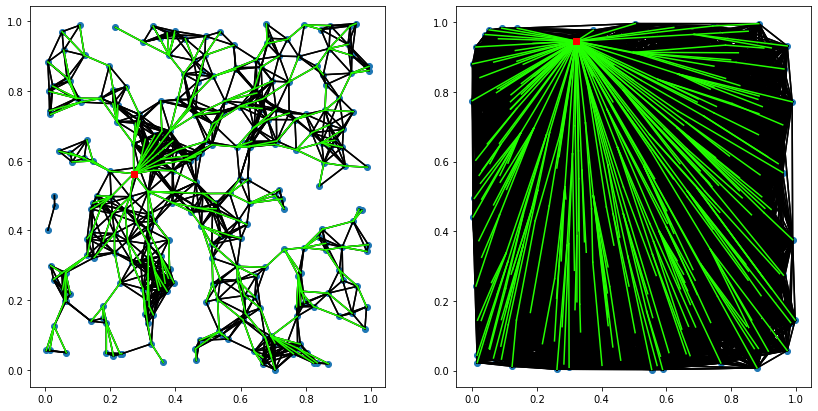

In [14]:
veliko_kratke = Kvadrat(300, 0.1)
veliko_dolge = Kvadrat(300, 0.4)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
veliko_kratke.narisi_tocke()
veliko_kratke.narisi_graf()
veliko_kratke.narisi_drevo()

plt.subplot(1, 2, 2)
veliko_dolge.narisi_tocke()
veliko_dolge.narisi_graf()
veliko_dolge.narisi_drevo()

<br>
<br>

## Kocka 

Program smo nato preselila v tri dimenzije. Funkcionalnost razreda `Kocka` je podobna kakor v razredu `Kvadrat`, zato ne bomo še enkrat ponazarjali osnovnih funkcionalnosti. Za zainteresirane bralce so na voljo v `vizualizacija.ipynb`.

## Primeri 


 Za boljšo predstavo o tem kaj se dogaja z izgledom grafov pri spreminjajo parametrou $n$ in $r$ smo dodali še nekaj primerov grafov enotskih kock. 

Pri spremijanju parametrov v enotski kocki pridemo do enakih ugotovitev kakor pri enotskem kvadratu; in sicer da parametri močno vplivajo na izgled dobljenega grafa. Prav tako se porabljen čas za izris kvadrata poveča, ko povečamo število točk. Pri $n = 20$ je bilo potrebnih $422$ ms, pri $n= 300$ pa $2$ min $3$ s. 

<br>

* Prvi graf: $n = 20$, $r = 0.2$.
* Drugi graf: $n = 20$, $r = 0.9$.

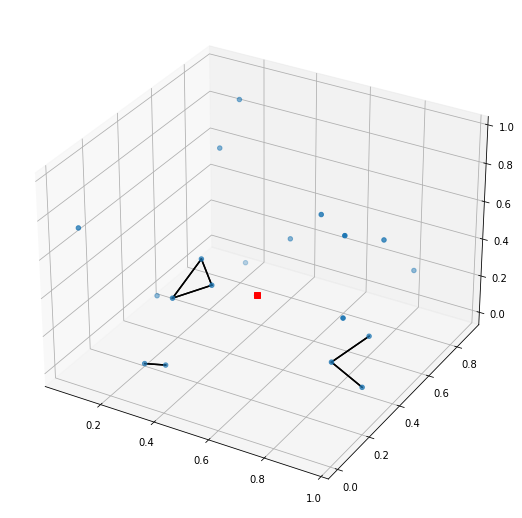

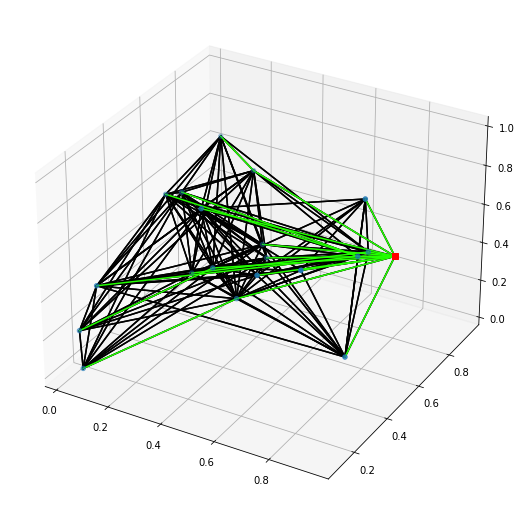

In [20]:
plt.rcParams['figure.figsize'] = [7, 7]
malo_kratke1 = Kocka(20, 0.2)
malo_dolge1 = Kocka(20, 0.9)

malo_kratke1.narisi_tocke()
malo_kratke1.narisi_graf()
malo_kratke1.narisi_drevo(koren=0)

malo_dolge1.narisi_tocke()
malo_dolge1.narisi_graf()
malo_dolge1.narisi_drevo(koren=0)

* Tretji graf: $n = 300$, $r = 0.2$.
* Četrti graf: $n = 300$, $r = 0.5$.

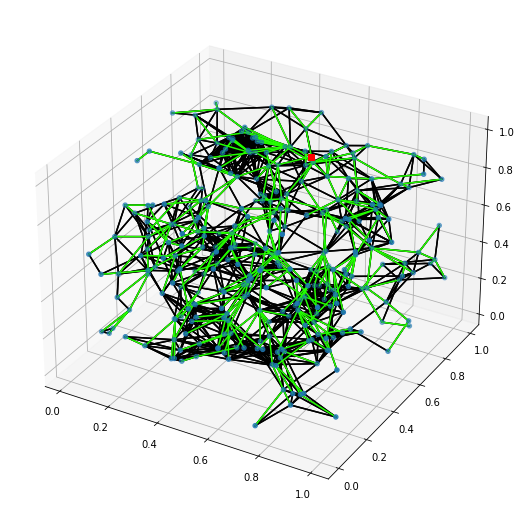

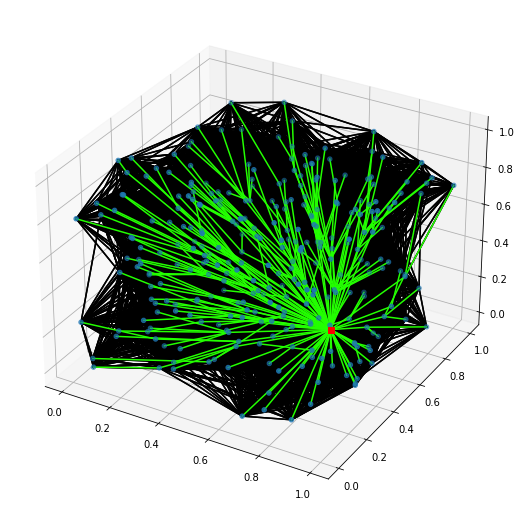

In [21]:
plt.rcParams['figure.figsize'] = [7, 7]
veliko_kratke1 = Kocka(300, 0.2)
veliko_dolge1 = Kocka(300, 0.5)

veliko_kratke1.narisi_tocke()
veliko_kratke1.narisi_graf()
veliko_kratke1.narisi_drevo(koren=0)

veliko_dolge1.narisi_tocke()
veliko_dolge1.narisi_graf()
veliko_dolge1.narisi_drevo(koren=0)

<br>
<br>

## Izračuni in ugotovitve


V tem delu poročila bomo  odgovorili na nekaj vprašanj, ki smo si jih postavili pred začetkom dela:
* Kako se spreminja dolžina drevesa najkrajših poti?
* Kako se spreminja vsota dolžin od korena do ostalih?
* Kako se spreminja dolžina najdaljše in najkrajše poti?
* Kateri parameter povzroči bolj drastične spremembe?

Med delom na našem projektu smo se odločili, da bomo poleg tega na koncu analizirali še s kolikšnim odstotkom ostalih vozlišč je povezano naključno izbrano vozlišče  in koliko ima to vozlišče bližnjih vozlišč, pri spreminjajočih parametrih. 

Podatke smo analizirali v šestih sklopih: Dolžina drevesa najkrajše poti, Vsota dolžin od korena do ostalih, Dolžina najdaljše poti, Dolžina najkrajše poti,  Odstotek bližnjih vozlišč in Odstotek povezanih vozlišč. V vsakem sklopu smo pogledali kaj se dogaja s preiskovano vrednostjo, če:

1. **spreminjamo maksimalno število točk ob dani maksimalni dovoljeni razdalji,**
2. **spreminjamo maksimalno dovoljeno razdaljo ob danem številu točk** in
3. **opazujemo spreminjanje obeh parametrov hkrati.**


 
Pri analizi rezultatov smo  za dano vrednost parametera $r$ v večini primerov vzeli $0.1, 0.3, 0.5, 0.7$ in $1.0$, za $n$ pa  vrednosti $25, 50, 100, 200$. Če se nam je v posameznem primeru zdela zanimiva primerjava med več različnimi ali drugimi vrednostmi naših parametrov, smo jih po potrebi dodali oz. spremenili.



**Opomba:** Velikorat se je zgodilo, da je graf zelo izstopal od povprečja pri zelo majhnih vrednostih naših parametrov. Predvsem za $r= 0.1$ (in $r = 0.2$) smo  velikorat dobili  drugačne grafe kakor pri ostalih (večjih) vrednostih, pri katerih so se grafi med seboj več ali manj prekrivali, zato smo v komentarju pod grafom ta odstopanja omenili in razložili zakaj do njih pride. Nato pa smo sklep napisali na podlagi prevledujočih podatkov in izjeme izpustili.


<br>



## Dolžina drevesa najkrajših poti



Najprej smo pogledali kako se spreminja dolžina drevesa najkrajših poti, ko spreminjamo naša parametra (število točk in največjo dovoljeno razdaljo). 



### 1. Spreminja se maksimalno število točk ob dani maksimalni dovoljeni razdalji:
    
Definirali smo novo funkcijo `dolzina_drevesa_tocke` v kateri smo maksimalno dovoljeno razdaljo $r$ vzeli za dano in pogledali, kako se spreminja skupna dolžina drevesa najkrajših poti, ko imamo med eno in `max_st_tock` točk. Definirana funkcija s `for` zanko pri konstantni  maksimalni razdalji preveri dolžine dreves najkrajših poti pri številu točk od `1` do `max_st_tock + 1` (zaradi Pythonove obravnave robov intervala, so zajete zares točke do `max_st_tock`). Funkcija `dolzina_drevesa_tocke` nam vrne seznama točk in njim pripadajočih dolžin. 

In [22]:
def dolzina_drevesa_tocke(max_st_tock=50, max_razdalja=0.3):
    tocke = []    
    dolzine = []
    
    for i in range(1, max_st_tock + 1):
        a = Kvadrat(i, max_razdalja)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        tocke.append(i)
        
        dolzina = 0
        for ata in oce:
            if oce[ata] is not None:
                dolzina += razdalja(ata, oce[ata])
        
        dolzine.append(dolzina)
            
    return tocke, dolzine

Iz dobljenih podatkov smo narisali **graf dolžine v odvisnosti od števila točk**. 

   Iz grafa je razvidno, da se dolžina drevesa najkrajših poti povečuje z naraščanjem maksimalnega števila točk. Naraščanje je z minimalnimi odstopanji, ki so zanemarljiva, precej linearno. Prisotnega pa je veliko šuma. Ta ugotovitev se nam zdi precej logična in nas ni presenetila.

Iz grafa je prav tako razvidno, da se strmina veča z večanjem $r$. Torej se dolžina drevesa povečuje hitreje, če je parameter $r$ večji.

**Sklep:** Pri večjih možnih največjih razdaljah in večjem številu točk  so tudi skupne dolžine drevesa najkrajših poti večje.
   


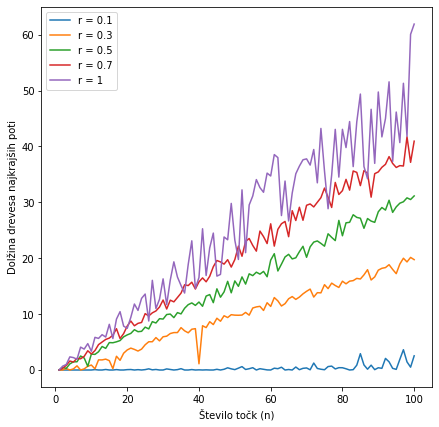

In [42]:
tocke0, dolzine0 = dolzina_drevesa_tocke(100, 0.1)
tocke1, dolzine1 = dolzina_drevesa_tocke(100, 0.3)
tocke2, dolzine2 = dolzina_drevesa_tocke(100, 0.5)
tocke3, dolzine3 = dolzina_drevesa_tocke(100, 0.7)
tocke4, dolzine4 = dolzina_drevesa_tocke(100, 1)

plt.plot(tocke0, dolzine0, label='r = 0.1');
plt.plot(tocke1, dolzine1, label='r = 0.3');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.xlabel('Število točk (n)');
plt.ylabel('Dolžina drevesa najkrajših poti');
plt.legend();

Ker smo v zgornjih izračunih opazili veliko šuma, smo izračun ponovili stokrat in povprečili. Vidimo da dobimo skoraj linearne funkcije z različnimi nakloni. Dobljen graf je potrdil našo ugotovitev: večji kot je $r$, hitreje se povečuje dolžina drevesa najkrajših poti. To je verjetno zato, ker ob večji največji dovoljeni razdalji lahko dosežemo več točk hitreje, kot pri manjši.

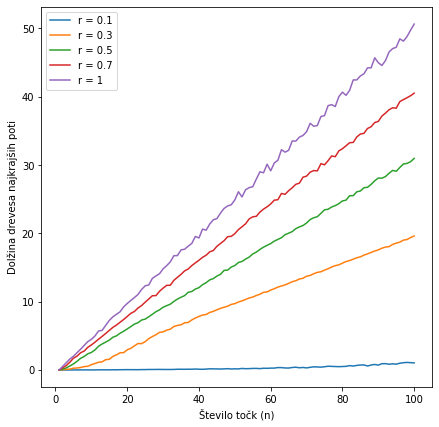

In [43]:
povp0 = []
povp1 = []
povp2 = []
povp3 = []
povp4 = []

for i in range(100):
    tocke0, dolzine0 = dolzina_drevesa_tocke(100, 0.1)
    tocke1, dolzine1 = dolzina_drevesa_tocke(100, 0.3)
    tocke2, dolzine2 = dolzina_drevesa_tocke(100, 0.5)
    tocke3, dolzine3 = dolzina_drevesa_tocke(100, 0.7)
    tocke4, dolzine4 = dolzina_drevesa_tocke(100, 1)
    
    povp0.append(dolzine0)
    povp1.append(dolzine1)
    povp2.append(dolzine2)
    povp3.append(dolzine3)
    povp4.append(dolzine4)
    
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)]
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  
povp4 = [sum(izracun)/len(izracun) for izracun in zip(*povp4)] 

plt.plot(tocke0, povp0, label='r = 0.1');
plt.plot(tocke1, povp1, label='r = 0.3');
plt.plot(tocke2, povp2, label='r = 0.5');
plt.plot(tocke3, povp3, label='r = 0.7');
plt.plot(tocke4, povp4, label='r = 1');
plt.xlabel('Število točk (n)');
plt.ylabel('Dolžina drevesa najkrajših poti');
plt.legend();


<br>

### 2. Spreminja se maksimalna dovoljena razdalja ob danem številu točk:

Definirali smo še funkcijo `dolzina_drevesa_razdalja` v kateri smo število točk $n$ vzeli za dano in opazovali, kako se spreminja skupna dolžina drevesa najkrajših poti, ko spreminjamo največjo dovoljeno razdaljo od `min_razdalja` do `max_razdalja`. Funkcija `dolzina_drevesa_razdalja` nam vrne seznama točk in dolžin pri tem številu točk.

In [25]:
def dolzina_drevesa_razdalja(st_tock=100, najmanj=0.1, najvec=0.9, korak=0.005):
    maxi = []    
    dolzine = []
    
    trenutna = najmanj
    
    while trenutna <= najvec:
        a = Kvadrat(st_tock, trenutna)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        maxi.append(trenutna)
        
        dolzina = 0
        for ata in oce:
            if oce[ata] is not None:
                dolzina += razdalja(ata, oce[ata])
        
        dolzine.append(dolzina)
        trenutna += korak
            
    return maxi, dolzine

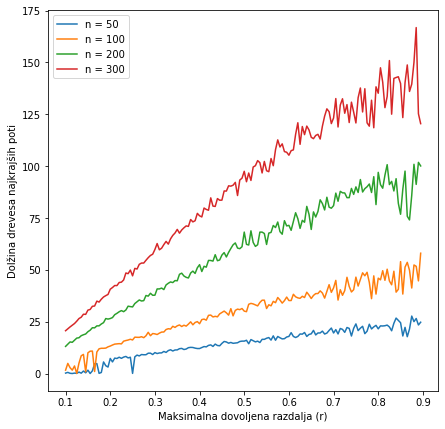

In [44]:
maxi1, dolzine1 = dolzina_drevesa_razdalja(50)
maxi2, dolzine2 = dolzina_drevesa_razdalja(100)
maxi3, dolzine3 = dolzina_drevesa_razdalja(200)
maxi4, dolzine4 = dolzina_drevesa_razdalja(300)

plt.plot(maxi1, dolzine1, label='n = 50');
plt.plot(maxi2, dolzine2, label='n = 100');
plt.plot(maxi3, dolzine3, label='n = 200');
plt.plot(maxi4, dolzine4, label='n = 300');
plt.xlabel('Maksimalna dovoljena razdalja (r)');
plt.ylabel('Dolžina drevesa najkrajših poti');
plt.legend();

Dobili smo graf  **dolžine v odvisnosti od maksimalne razdalje**. 

Takoj opazimo, da se nihanja grafa povečujejo, s tem ko se povečuje parameter $r$. 
Pri največji vrednosti $n = 300$ je naš graf najbolj strm. Skupna dolžina drevesa  pri $r= 0.1$ in pri $r = 0.9$ se razlikuje za približno 90 enot. Medtem ko je pri $n = 50$ naš graf najbolj položen; skupna dolžina drevesa pa se pri parametrih $r = 0.1$ in $r = 0.9$ razlikueta za bistveno manj; in sicer za približno 20 enot. 

Tokrat ni prisotnega toliko šuma, zato se nam povprečenje ni zdelo potrebno.

**Sklep:** Več kot je točk in večja kot je maksimalna razdalja, daljše so skupne dolžine drevesa najkrajših poti.


<br>

### 3. Opazujemo spreminjanje obeh parametrov hkrati:

V 3D smo pogledali kako se spreminja dolžina in vsota dolžin drevsa najkrajših poti, če spreminjamo maksimalno razdaljo in maksimalno število točk hkrati. Prikaz v 3D grafu potrjuje naš dobljeni sklep pri zgornjem primeru.

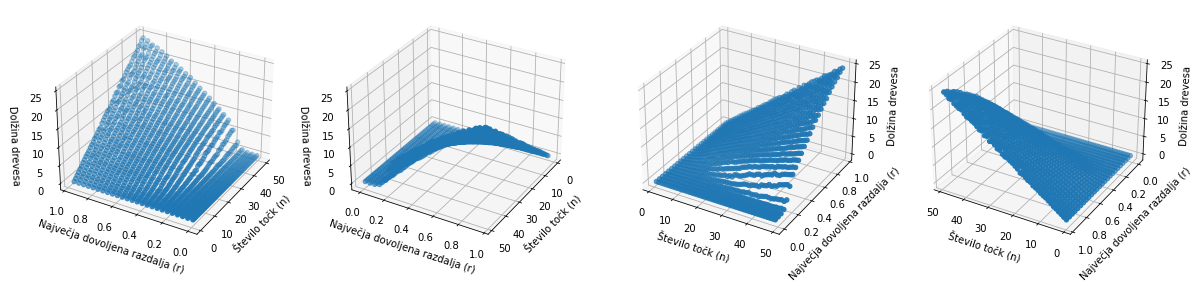

In [27]:
korak = 0.04

povp = []

for i in range(100):
    nji = []
    maxiji = []
    dolzineji = []
    for n in range(1, 50):
        
        maxi, dolzine = dolzina_drevesa_razdalja(n, 0, 1, korak)
        
        nji += [n for i in range(int(1/korak))]
        maxiji += maxi
        dolzineji += dolzine
    
    povp.append(dolzineji)
    
povp = [sum(izracun)/len(izracun) for izracun in zip(*povp)] 
    
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)


ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.view_init(30, 210)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Dolžina drevesa')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.view_init(30, 30)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Dolžina drevesa')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.view_init(30, 300)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Dolžina drevesa')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.view_init(30, 120)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Dolžina drevesa')
ax.scatter(nji, maxiji, povp);

<br>
<br>
<br>



## Vsota dolžin od korena do ostalih 



Opazujemo vsoto dolžin od korena do ostalih, ob spreminjanju števila točk in največje razdalje.


### 1. Spreminja se maksimalno število točk ob dani maksimalni dovoljeni razdalji:


V na novo definirani funkciji `vsota_razdalj_tocke` maksimalno dovljeno razdaljo $r$ vzamemo za dano in pogledamo, kako se spreminja vsota razdalj od korena do ostalih, ko imamo med eno in `max_st_tock` točk.

In [28]:
def vsota_razdalj_tocke(max_st_tock=50, max_razdalja=0.3):
    tocke = []
    vsote = []
    
    for i in range(1, max_st_tock + 1):
        a = Kvadrat(i, max_razdalja)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        tocke.append(i)
        
        dolzina = 0
        for tocka in oddaljenost:
            if oddaljenost[tocka] < 1000000:
                dolzina += oddaljenost[tocka]
            
        vsote.append(dolzina)
            
    return tocke, vsote

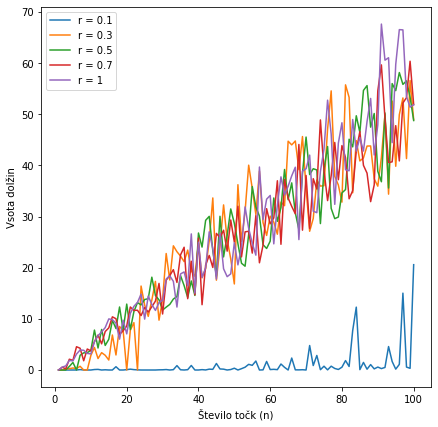

In [29]:
tocke1, dolzine1 = vsota_razdalj_tocke(100, 0.1)
tocke2, dolzine2 = vsota_razdalj_tocke(100, 0.3)
tocke3, dolzine3 = vsota_razdalj_tocke(100, 0.5)
tocke4, dolzine4 = vsota_razdalj_tocke(100, 0.7)
tocke5, dolzine5 = vsota_razdalj_tocke(100, 1)

plt.plot(tocke1, dolzine1, label='r = 0.1');
plt.plot(tocke2, dolzine2, label='r = 0.3');
plt.plot(tocke3, dolzine3, label='r = 0.5');
plt.plot(tocke4, dolzine4, label='r = 0.7');
plt.plot(tocke5, dolzine5, label='r = 1');
plt.xlabel('Število točk (n)');
plt.ylabel('Vsota dolžin');
plt.legend();

Dobimo **graf vsote v odvisnosti od števila točk**. 

Iz grafa je razvidno, da se vsota dolžin od korena do ostalih povečuje z naraščanjem maksimalnega števila točk. Naraščanje je v grobem linearno, ampak z večjimi nihanji kakor pri grafu dolžine drevesa najkrajših poti v odvisnosti od števila točk.

Pri $r= 0.1$ graf izrazito odstopa od ostalih. Vrednost vsote dolžin od korena do ostalih je velikokrat enaka $0$ ali pa malo nad $0$. O ostalih primerih težko povemo kaj drugega kot to, da se vsaj približno prekrivajo.


**Sklep:** Pri večjem številu točk so tudi vsote dolžin od korena do ostalih večje. Maksimalna razdalja na vsoto dolžin od korena do ostalin ne vpliva.

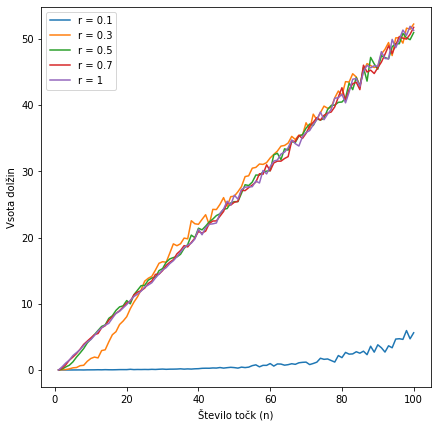

In [30]:
povp0 = []
povp1 = []
povp2 = []
povp3 = []
povp4 = []

for i in range(100):
    tocke0, dolzine0 = vsota_razdalj_tocke(100, 0.1)
    tocke1, dolzine1 = vsota_razdalj_tocke(100, 0.3)
    tocke2, dolzine2 = vsota_razdalj_tocke(100, 0.5)
    tocke3, dolzine3 = vsota_razdalj_tocke(100, 0.7)
    tocke4, dolzine4 = vsota_razdalj_tocke(100, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(dolzine0)
    povp1.append(dolzine1)
    povp2.append(dolzine2)
    povp3.append(dolzine3)
    povp4.append(dolzine4)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  
povp4 = [sum(izracun)/len(izracun) for izracun in zip(*povp4)] 

# narišemo
plt.plot(tocke0, povp0, label='r = 0.1');
plt.plot(tocke1, povp1, label='r = 0.3');
plt.plot(tocke2, povp2, label='r = 0.5');
plt.plot(tocke3, povp3, label='r = 0.7');
plt.plot(tocke4, povp4, label='r = 1');
plt.xlabel('Število točk (n)');
plt.ylabel('Vsota dolžin');
plt.legend();

Tudi v tem primeru smo zaradi šuma izračun ponovili na stotih primerih in na grafu prikazali dobljeno povprečje. Razen izstopajoče izjeme grafa pri $r= 0.1$ smo drugače dobili linearno naraščajočo funkcijo. Graf potrjuje naše že dobljene ugotovitve. 

Zanimivo pa se nam zdi, da se pri večjih $n$ tudi graf za $r=0.1$ začne dvigovati. Ko pogledamo še graf za $r=0.3$, vidimo, da je tudi ta v začetku "manj linearen", kot ostali. Morda bi se tako obnašanje pojavilo tudi pri $r=0.1$, a nas v tem primeru omejuje strojna oprema in čas.


<br>

### 2. Spreminja se maksimalna dovoljena razdalja ob danem številu točk:

V funkciji `dolzina_razdalj_razdalja`  smo število točk $n$ vzeli za dano in gledali, kako se spreminja vsota razdalj od korena do ostalih, ko spreminjamo največjo dovoljeno razdaljo od `min_razdalja` do `max_razdalja`. 

In [31]:
def vsota_razdalj_razdalja(st_tock=100, najmanj=0.1, najvec=0.9, korak=0.005):
    maxi = []    
    vsote = []
    
    trenutna = najmanj
    
    while trenutna <= najvec:
        a = Kvadrat(st_tock, trenutna)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        vsota = 0
        for tocka in oddaljenost:
            if oddaljenost[tocka] < 1000000:
                vsota += oddaljenost[tocka]
        
        vsote.append(vsota)
        maxi.append(trenutna)
        trenutna += korak
    return maxi, vsote            

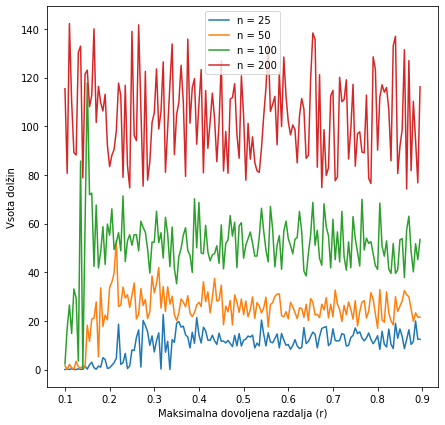

In [45]:
maxi0, dolzine0 = vsota_razdalj_razdalja(25)
maxi1, dolzine1 = vsota_razdalj_razdalja(50)
maxi2, dolzine2 = vsota_razdalj_razdalja(100)
maxi3, dolzine3 = vsota_razdalj_razdalja(200)


plt.plot(maxi0, dolzine0, label='n = 25');
plt.plot(maxi1, dolzine1, label='n = 50');
plt.plot(maxi2, dolzine2, label='n = 100');
plt.plot(maxi3, dolzine3, label='n = 200');
plt.xlabel('Maksimalna dovoljena razdalja (r)');
plt.ylabel('Vsota dolžin');
plt.legend();

Dobili smo **graf  vsote v odvisnosti od maksimalne razdalje**. Za primerjavo smo vzeli različne vrednosti parametra $n = 25, 50, 100, 200$. Maksimalna razdalja pa teče  od $0.1$ do $0.9$.

Z izjemo vrednosti vsote pri $r = 0.1$, ki zelo odstopa od povprečja (to je razumljivo, ker bodo pri tako majhni razdalji točke ostale nepovezane in bo vsota dolžin od korena do ostalih enaka $0$) se zdi, da je vdota dolžin neodvisna od spreminjanja $r$. Vidimo torej, da povečevanje maksimalne dovoljene razdalje ne vpliva na vsoto dolžin od korena do ostalih. Vsota se pri $r = 0.9$ ne razlikuje bistveno z vsoto pri $r = 0.3$ pri danem parametru $n$. Vsota pa je večja pri večjih vrednostih parametra $n$, kar ni presenetljivo. 

**Sklep:** S povečevanjem maksimalne dovoljene razdalje ni bistvenih razlik pri vrednosti vsote od korena do ostalih. Z večanjem števila točk pa se veča tudi vsota od korena do ostalih.

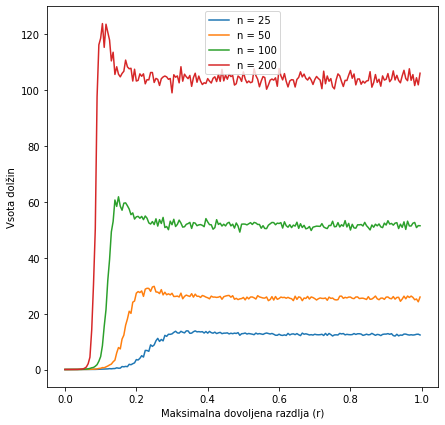

In [33]:
povp0 = []
povp1 = []
povp2 = []
povp3 = []

for i in range(100):
    
    tocke0, dolzine0 = vsota_razdalj_razdalja(25, 0, 1)
    tocke1, dolzine1 = vsota_razdalj_razdalja(50, 0, 1)
    tocke2, dolzine2 = vsota_razdalj_razdalja(100, 0, 1)
    tocke3, dolzine3 = vsota_razdalj_razdalja(200, 0, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(dolzine0)
    povp1.append(dolzine1)
    povp2.append(dolzine2)
    povp3.append(dolzine3)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  

# narišemo
plt.plot(tocke0, povp0, label='n = 25');
plt.plot(tocke1, povp1, label='n = 50');
plt.plot(tocke2, povp2, label='n = 100');
plt.plot(tocke3, povp3, label='n = 200');
plt.xlabel('Maksimalna dovoljena razdlja (r)');
plt.ylabel('Vsota dolžin');
plt.legend();

Zaradi šuma izračune izvedemo večkrat in povprečimo. Pri majhnih vrednostih parametra $r$ opazimo zelo izrazit skok; večja kot je vrednost $n$-ja višji je skos. Pri približno $r= 0.3$ se nato nihanja umirijo in dobimo konstantno funkcijo s čimer utrdimo zaupanje v naš sklep.

Odstopanja pri majhnih $r$ so verjetno posledica tega, da najprej koren velikokrat ni povezan z nobeno drugo točko. Ko se končno uspe povezati, ta vrednost skoči, prav tako pa razdalja pri kateri se uspe povezati ni čisto fiksna. To pripelje do volatilnega skoka, ki je bolj izrazit pri večjem številu točk - to je smiselno, saj dam našo vsoto čaka večja zaloga poti, ko se koren končno poveže.


<br>

### 3. Opazujemo spreminjanje obeh parametrov hkrati:

V 3D smo pogledali kako se spreminja vsota dolžin od korena do ostalih, če spreminjamo maksimalno razdaljo in maksimalno število točk hkrati. Iz grafa se nazorno vidi hiter skok pri majhnih vrednostih $r$-ja, ki smo ga opazili že zgoraj. In neodvisnost od velikosti $r$, ko ta preseže mejo.

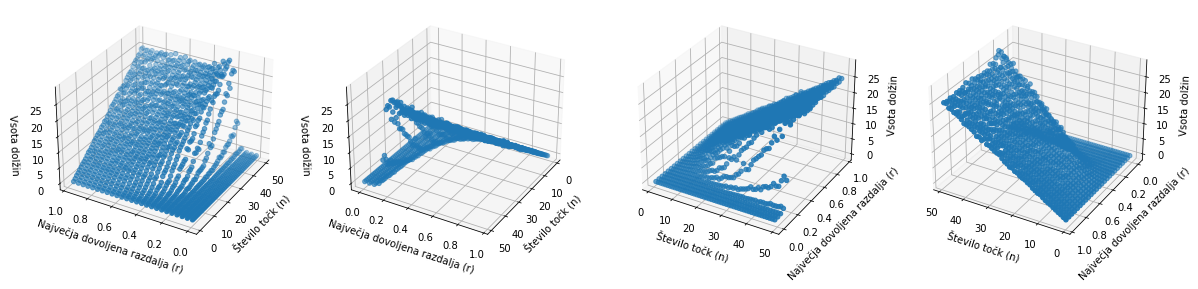

In [34]:
korak = 0.04

povp = []

for i in range(100):
    nji = []
    maxiji = []
    dolzineji = []
    for n in range(1, 50):
        
        maxi, dolzine = vsota_razdalj_razdalja(n, 0, 1, korak)
        
        nji += [n for i in range(int(1/korak))]
        maxiji += maxi
        dolzineji += dolzine
    
    povp.append(dolzineji)
    
povp = [sum(izracun)/len(izracun) for izracun in zip(*povp)] 
    
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.view_init(30, 210)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.view_init(30, 30)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.view_init(30, 300)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.view_init(30, 120)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

<br>
<br>
<br>



## Dolžina najdaljše poti



Gledamo kako se spreminja dolžina  najdaljše poti v odvisnosti od $n$ in $r$. Pri tem misllimo dolžino najdaljše poti v drevesu najkrajših poti, in ne nasploh v dobljenem grafu.



### 1. Spreminja se maksimalno število točk ob dani maksimalni dovoljeni razdalji:

Definirali smo funkcijo `najdaljsa_pot_tocke`, v kateri maksimalno dovoljeno razdaljo $r$ vzamemo za dano in pogledamo, 
    kako se spreminja dolžina najdaljše poti, ko 
    imamo med eno in `max_st_tock` točk.

In [35]:
def najdaljsa_pot_tocke(max_st_tock=50, max_razdalja=0.3):
    tocke = []    
    dolzine = []
    
    for i in range(1, max_st_tock + 1):
        a = Kvadrat(i, max_razdalja)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        tocke.append(i)
        
        dolzina = 0   
        if max(oddaljenost.values()) < 1000000:
            dolzina = max(oddaljenost.values())
        
        dolzine.append(dolzina)
            
    return tocke, dolzine

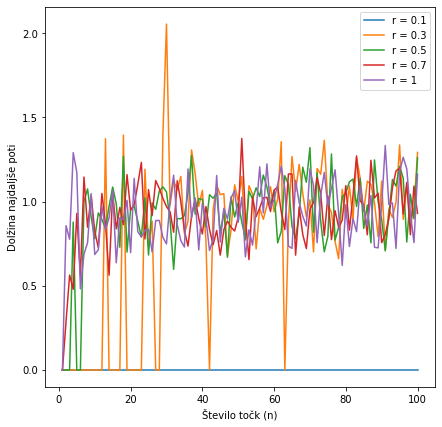

In [36]:
tocke0, dolzine0 = najdaljsa_pot_tocke(100, 0.1)
tocke1, dolzine1 = najdaljsa_pot_tocke(100, 0.3)
tocke2, dolzine2 = najdaljsa_pot_tocke(100, 0.5)
tocke3, dolzine3 = najdaljsa_pot_tocke(100, 0.7)
tocke4, dolzine4 = najdaljsa_pot_tocke(100, 1)

plt.plot(tocke0, dolzine0, label='r = 0.1');
plt.plot(tocke1, dolzine1, label='r = 0.3');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.xlabel('Število točk (n)');
plt.ylabel('Dolžina najdaljše poti');
plt.legend();

Narisali smo **graf dolžine najdaljše poti v odvisnosti od števila točk**.
   
V tem grafu dolžine v odvisnosti od števila točk smo za primerjavo vzeli različne vrednosti parametra $r = 0.1, 0.3,  0.5,  0.7,  1$. Maksimalno število točk v tem primeru teče od $1$ do $100$.

Takoj opazimo da graf pri $r = 0.1$ precej odstopa od ostalih. Zdi se, da se točka ni uspela povezati z nobeno drugo točko, ali pa so bile poti zelo kratke. Za $r=0.3$ je prisotna najvišja volatilnost, kar nas ne čudi, saj se tudi pri tej razdalji pogosto točka ne uspe povezati. Za ostale parametre se zdijo grafi precej prekrivajoči, in pretežno konstantni, a težko pridemo do konkretnih sklepov.
    
**Sklep:** Z povečevanjem maksimalnega števila točk  ni bistvenih razlik pri vrednosti dolžine najdaljše poti.

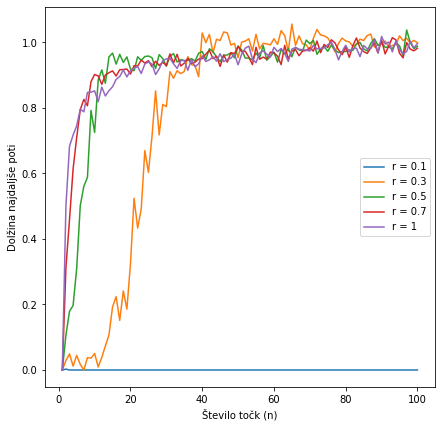

In [37]:
povp0 = []
povp1 = []
povp2 = []
povp3 = []
povp4 = []

for i in range(100):
    tocke0, dolzine0 = najdaljsa_pot_tocke(100, 0.1)
    tocke1, dolzine1 = najdaljsa_pot_tocke(100, 0.3)
    tocke2, dolzine2 = najdaljsa_pot_tocke(100, 0.5)
    tocke3, dolzine3 = najdaljsa_pot_tocke(100, 0.7)
    tocke4, dolzine4 = najdaljsa_pot_tocke(100, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(dolzine0)
    povp1.append(dolzine1)
    povp2.append(dolzine2)
    povp3.append(dolzine3)
    povp4.append(dolzine4)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  
povp4 = [sum(izracun)/len(izracun) for izracun in zip(*povp4)] 

# narišemo
plt.plot(tocke0, povp0, label='r = 0.1');
plt.plot(tocke1, povp1, label='r = 0.3');
plt.plot(tocke2, povp2, label='r = 0.5');
plt.plot(tocke3, povp3, label='r = 0.7');
plt.plot(tocke4, povp4, label='r = 1');
plt.xlabel('Število točk (n)');
plt.ylabel('Dolžina najdaljše poti');
plt.legend();

100-krat izračunan in povprečen graf je veliko bolj informativen. Takoj opazimo ponovno odstopanje grafa za $r=0.1$. To, da je v povprečju pot dolga 0 nas ne preseneti, če pomislimo, da je to povprečje vredosti, za katero že vemo da je majhna (in pogosto 0). 

Drugače pa opazimo "konvergenco" proti vrednosti probližno $1$ po velikem skoku na začetku. Dolžina najdaljše poti se zato res zdi neodvisna od $r$ za dogledno količino točk. 

Ponovno primerjamo $r = 0.1, 0.3$ z ostalimi. Glede na obnašanje $0.3$ bi lahko morda sklepali, da bo tudi $0.1$ nekoč dosegel kritično število točk in se pridružil ostalim grafom, a smo ponovno omejeni z opremo in časom.


<br>

### 2. Spreminja se maksimalna dovoljena razdalja ob danem številu točk:
    
V funkciji `najdaljsa_pot_razdalja` vzamemo število točk za dano in gledamo, kako se spreminja dolžina 
    najdaljše poti, ko spreminjamo največjo dovoljeno razdaljo od 
    `min_razdalja` do `max_razdalja`.

In [38]:
def najdaljsa_pot_razdalja(st_tock=100, najmanj=0.1, najvec=0.9, korak=0.005):
    maxi = []    
    dolzine = []
    
    trenutna = najmanj
    
    while trenutna <= najvec:
        a = Kvadrat(st_tock, trenutna)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        maxi.append(trenutna)
        
        dolzina = 0
        if max(oddaljenost.values()) < 1000000:
            dolzina = max(oddaljenost.values())
        
        dolzine.append(dolzina)
        trenutna += korak
            
    return maxi, dolzine

In [ ]:
maxi0, dolzine0 = najdaljsa_pot_razdalja(25)
maxi1, dolzine1 = najdaljsa_pot_razdalja(50)
maxi2, dolzine2 = najdaljsa_pot_razdalja(100)
maxi3, dolzine3 = najdaljsa_pot_razdalja(200)

plt.plot(maxi0, dolzine0, label='n = 25');
plt.plot(maxi1, dolzine1, label='n = 50');
plt.plot(maxi2, dolzine2, label='n = 100');
plt.plot(maxi3, dolzine3, label='n = 200');
plt.xlabel('Maksimalna dovoljena razdalja (r)');
plt.ylabel('Dolžina najdaljše poti');
plt.legend();

To je **graf dolžine najdlajše poti v odvisnosti od maksimalne razdalje**.

Vidimo da dolžina najdaljše poti pri majhnih $r$-jih zelo niha, nekajkrat je celo enaka $0$. Pri drugih vrednostih parametra $r$ se z večanjem maksimalne razdalje dolžina najdlajše poti ne spreminja veliko. V vseh primerih grafov vidimo, da povprečna dolžina najdaljše poti v grobem ne preseže $1$. 


**Sklep:** Z povečevanjem maksimalne dovoljene razdalje ni bistvenih razlik pri vrednosti dolžine najdaljše poti (izjema so majhni $r$-ji).

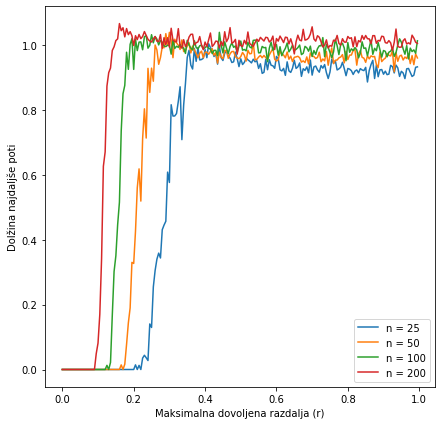

In [47]:
povp0 = []
povp1 = []
povp2 = []
povp3 = []

for i in range(100):
    tocke0, dolzine0 = najdaljsa_pot_razdalja(25, 0, 1)
    tocke1, dolzine1 = najdaljsa_pot_razdalja(50, 0, 1)
    tocke2, dolzine2 = najdaljsa_pot_razdalja(100, 0, 1)
    tocke3, dolzine3 = najdaljsa_pot_razdalja(200, 0, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(dolzine0)
    povp1.append(dolzine1)
    povp2.append(dolzine2)
    povp3.append(dolzine3)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  

# narišemo
plt.plot(tocke0, povp0, label='n = 25');
plt.plot(tocke1, povp1, label='n = 50');
plt.plot(tocke2, povp2, label='n = 100');
plt.plot(tocke3, povp3, label='n = 200');
plt.xlabel('Maksimalna dovoljena razdalja (r)');
plt.ylabel('Dolžina najdaljše poti');
plt.legend();

V tem primeru je razlika med grafom po enem izračunu in po $100$ povprečenih izračunih zelo očitna. Spet dobimo izrazit skok pri majhnih vrednostih $r$-ja. Dolžina najdaljše poti se nato skoncentrira okoli vrednosti $1$. Grafi se ne glede na vrednost spremenljivke $n$ obnašajo zelo podobno z dodatkom zamika pri skoku; večji kot je $n$, manjši $r$ je potreben za skok. To je posledica tega, da je za večje $n$ bolj verjetno, da bo koren povezan z vsaj še enim vozliščem. 

Vrednost 1 kot nekakšna okvirna zgornja meja pride najverjetneje iz velikosti enotskega kvadrata.


<br>

### 3. Opazujemo spreminjanje obeh parametrov hkrati:

V 3D smo pogledali kako se spreminja dolžina najdaljše poti, če spreminjamo maksimalno razdaljo in maksimalno število točk hkrati. Graf potrjuje zgornje sklepe.

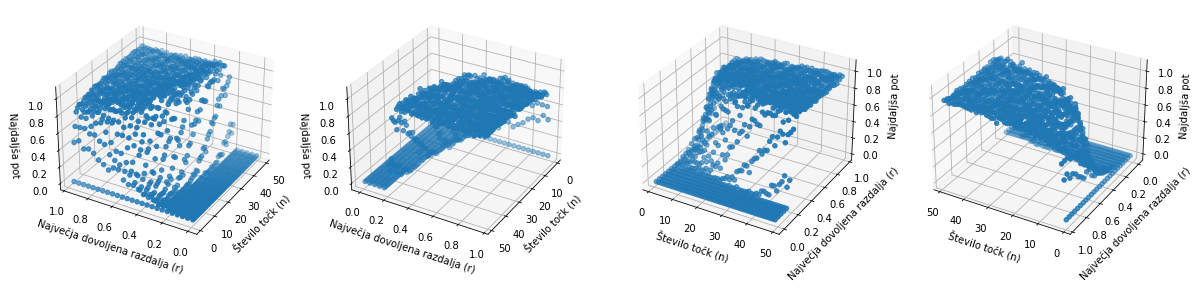

In [48]:
korak = 0.04

povp = []

# spreminjamo število točk in kličemo zgornjo funkcijo
for i in range(100):
    # definiramo prazne sezname - to bodo koordinate točk
    nji = []
    maxiji = []
    dolzineji = []
    for n in range(1, 50):
        
        # izračunamo dolžine
        
        maxi, dolzine = najdaljsa_pot_razdalja(n, 0, 1, korak)
        
        nji += [n for i in range(int(1/korak))]
        maxiji += maxi
        dolzineji += dolzine
        
    povp.append(dolzineji)
    
povp = [sum(izracun)/len(izracun) for izracun in zip(*povp)] 
    
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)

# s pomočjo funkcije subplot narišemo grafa enega ob drugem

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.view_init(30, 210)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Najdaljša pot')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.view_init(30, 30)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Najdaljša pot')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.view_init(30, 300)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Najdaljša pot')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.view_init(30, 120)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Najdaljša pot')
ax.scatter(nji, maxiji, povp);

<br>
<br>
<br>

## Dolžina najkrajše poti

Gledamo kako se spreminja dolžina  najkrajše poti v odvisnosti od $n$ in $r$. V tem primeru ni dileme, ali je najkrajša pot mišljena v grafu ali drevesu najkrajših poti, saj ti dve poti sovpadata.

### 1. Spreminja se maksimalno število točk ob dani maksimalni dovoljeni razdalji:

Definirali smo funkcijo `najkrajsa_pot_tocke`, v kateri maksimalno dovoljeno razdaljo $r$ vzamemo za dano in pogledamo, 
    kako se spreminja dolžina najkrajše poti, ko 
    imamo med eno in `max_st_tock` točk.

In [49]:
def najkrajsa_pot_tocke(max_st_tock=50, max_razdalja=0.3):
    """
    Maksimalno dovoljeno razdaljo 'r' vzamemo za dano in pogledamo, 
    kako se spreminja dolžina najkrajše poti, ko 
    imamo med eno in 'max_st_tock' točk.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    tocke = []    
    dolzine = []
    
    # pogledamo različna števila točk
    for i in range(1, max_st_tock + 1):
        a = Kvadrat(i, max_razdalja)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        tocke.append(i)
        
        kandidati = [x for x in oddaljenost.values() if x > 0]
        #postavimo na 0, da bo vedno definirano
        minimalna = 0
        if (len(kandidati) > 0) and (min(kandidati) < 1000000):
            minimalna = min(kandidati)
        
        dolzine.append(minimalna)
            
    return tocke, dolzine

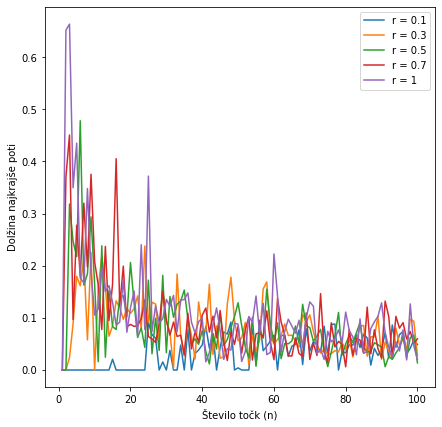

In [50]:
tocke0, dolzine0 = najkrajsa_pot_tocke(100, 0.1)
tocke1, dolzine1 = najkrajsa_pot_tocke(100, 0.3)
tocke2, dolzine2 = najkrajsa_pot_tocke(100, 0.5)
tocke3, dolzine3 = najkrajsa_pot_tocke(100, 0.7)
tocke4, dolzine4 = najkrajsa_pot_tocke(100, 1)

plt.plot(tocke0, dolzine0, label='r = 0.1');
plt.plot(tocke1, dolzine1, label='r = 0.3');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.xlabel('Število točk (n)');
plt.ylabel('Dolžina najkrajše poti');
plt.legend();

Narisali smo **graf dolžine najkrajše poti v odvisnosti od števila točk**.

Pri manjšem številu točk večkrat dobimo daljšo dolžino najkrajše poti, kako pri večjem številu točk, kjer je ne glede ne vrednost parametra $r$ dolžina najkrajše poti manjša. Ta trend se zdi smiselen, saj imamo pri večjem številu točk več "izbire" glede najkrajše poti.

**Sklep:** Z povečevanjem maksimalnega števila točk  se manjša dolžine najkrajše poti.

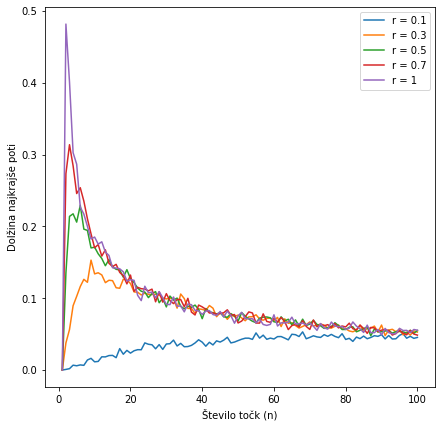

In [51]:
povp0 = []
povp1 = []
povp2 = []
povp3 = []
povp4 = []

for i in range(100):
    tocke0, dolzine0 = najkrajsa_pot_tocke(100, 0.1)
    tocke1, dolzine1 = najkrajsa_pot_tocke(100, 0.3)
    tocke2, dolzine2 = najkrajsa_pot_tocke(100, 0.5)
    tocke3, dolzine3 = najkrajsa_pot_tocke(100, 0.7)
    tocke4, dolzine4 = najkrajsa_pot_tocke(100, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(dolzine0)
    povp1.append(dolzine1)
    povp2.append(dolzine2)
    povp3.append(dolzine3)
    povp4.append(dolzine4)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  
povp4 = [sum(izracun)/len(izracun) for izracun in zip(*povp4)] 

# narišemo
plt.plot(tocke0, povp0, label='r = 0.1');
plt.plot(tocke1, povp1, label='r = 0.3');
plt.plot(tocke2, povp2, label='r = 0.5');
plt.plot(tocke3, povp3, label='r = 0.7');
plt.plot(tocke4, povp4, label='r = 1');
plt.xlabel('Število točk (n)');
plt.ylabel('Dolžina najkrajše poti');
plt.legend();

Ker smo v zgornjih izračunih opazili veliko šuma smo izračun ponovili stokrat in povprečili. Pri majhnih vrednostih maksimalnega števila točk opazimo sunkovit skok, nato pa dolžina najkrajše poti začne upadati in se ne glede na vrednost $r$ skoncentrira okoli vrednosti $0.5$. Kakor v vseh primerih do sedaj tudi tukaj vidimo da je začetni skok bolj izrazit, če je parameter $r$ večji.

Tudi podobno kot doslej, opazimo malce čudno vedenje pri $r=0.1$. Tu je verjetno povprečje zmanjšala večkratna pojavitev vrednosti $0$ kot dolžine najkrajše poti. To je omililo skok, ko pa smo dodali dovolj točk, pa je postala dolžina res neodvisna od $r$. Smiselno bi bilo sklepati, da ta dolžina konvergira proti $0$, četudi to ni najbolj oćitno iz slike. Tak sklep pride iz dejstva, da bomo pri veliki količini točk verjetno zelo gosto prekrili enostski kvadrat.

<br>

### 2. Spreminja se maksimalna dovoljena razdalja ob danem številu točk:
    
V funkciji `najkrajsa_pot_razdalja` vzamemo število točk za dano in gledamo, kako se spreminja dolžina 
    najkrajše poti, ko spreminjamo največjo dovoljeno razdaljo od 
    `min_razdalja` do `max_razdalja`.

In [52]:
def najkrajsa_pot_razdalja(st_tock=100, najmanj=0.1, najvec=0.9, korak=0.005):
    """
    Vzamemo število točk za dano in gledamo, kako se spreminja dolžina 
    najkrajše poti, ko spreminjamo največjo dovoljeno razdaljo od 
    'min_razdalja' do 'max_razdalja'.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    maxi = []    
    dolzine = []
    
    trenutna = najmanj
    
    while trenutna <= najvec:
        a = Kvadrat(st_tock, trenutna)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        maxi.append(trenutna)
        
        kandidati = [x for x in oddaljenost.values() if x > 0]
        #postavimo na 0, da bo vedno definirano
        minimalna = 0
        if (len(kandidati) > 0) and (min(kandidati) < 1000000):
            minimalna = min(kandidati)
        
        dolzine.append(minimalna)
        
        trenutna += korak
            
    return maxi, dolzine

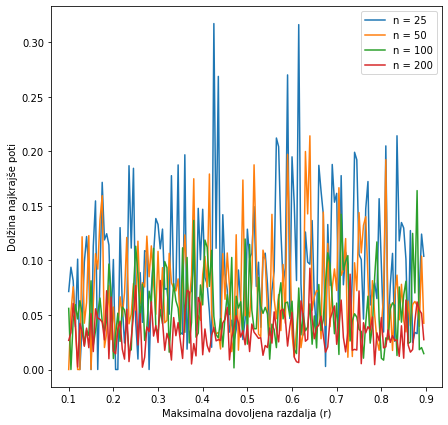

In [53]:
maxi0, dolzine0 = najkrajsa_pot_razdalja(25)
maxi1, dolzine1 = najkrajsa_pot_razdalja(50)
maxi2, dolzine2 = najkrajsa_pot_razdalja(100)
maxi3, dolzine3 = najkrajsa_pot_razdalja(200)

plt.plot(maxi0, dolzine0, label='n = 25');
plt.plot(maxi1, dolzine1, label='n = 50');
plt.plot(maxi2, dolzine2, label='n = 100');
plt.plot(maxi3, dolzine3, label='n = 200');
plt.xlabel('Maksimalna dovoljena razdalja (r)');
plt.ylabel('Dolžina najkrajše poti');
plt.legend();

Dobili smo **graf dolžine najkrajše poti v odvisnosti od maksimalne razdalje**.

Na grafu je prisotna gromozanska količina šuma, tako da brez povprečenja lahko spodnji sklep jemljemo bolj kot ubibanje o dogajanju. Se pa zdi, da so vrednsoti za višje $n$ bolj "umirjene" (recimo rdeči graf).

**Sklep:** Maksimalna razdalja ne vpliva na dolžino najkrajše poti.

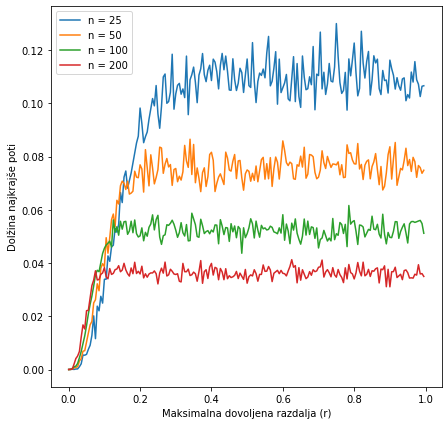

In [54]:
povp0 = []
povp1 = []
povp2 = []
povp3 = []

for i in range(100):
    tocke0, dolzine0 = najkrajsa_pot_razdalja(25, 0, 1)
    tocke1, dolzine1 = najkrajsa_pot_razdalja(50, 0, 1)
    tocke2, dolzine2 = najkrajsa_pot_razdalja(100, 0, 1)
    tocke3, dolzine3 = najkrajsa_pot_razdalja(200, 0, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(dolzine0)
    povp1.append(dolzine1)
    povp2.append(dolzine2)
    povp3.append(dolzine3)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  

# narišemo
plt.plot(tocke0, povp0, label='n = 25');
plt.plot(tocke1, povp1, label='n = 50');
plt.plot(tocke2, povp2, label='n = 100');
plt.plot(tocke3, povp3, label='n = 200');
plt.xlabel('Maksimalna dovoljena razdalja (r)');
plt.ylabel('Dolžina najkrajše poti');
plt.legend();

Tokrat je povprečenje razkrilo prej popolnoma nevidno vedenje. Dobili smo graf iz katerega je razvidno da so dolžine najkrajše poti večje pri manjših vrednostih parametra $n$. Ponovno bi to lahko razložili s tem, da imamo pri manjših $n$ manj "izbire" glede poti.

Zanimivo je tudi, da za male $r$ dolžine sovpadajo, potem pa se postopoma glede na $n$ ustalijo vsaka pri svoji vrednosti.


<br>

### 3. Opazujemo spreminjanje obeh parametrov hkrati:

V 3D smo pogledali kako se spreminja dolžina najdaljše poti, če spreminjamo maksimalno razdaljo in maksimalno število točk hkrati. Graf potrjuje zgornje sklepe. Izstopa tudi "špica" pri velikih $r$ in malih $n$, ki je posledica tega, da velik $r$ dovoljuje povezanost zelo oddaljenih točk, take so pa pri malih $n$ verjetno kar vse. 

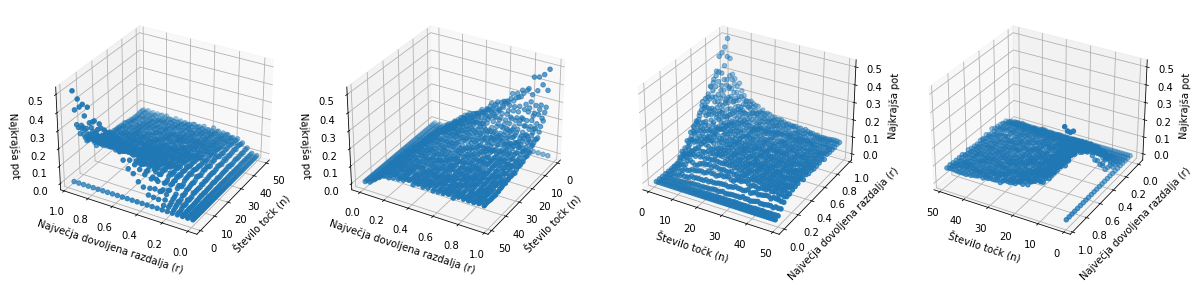

In [55]:
# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

korak = 0.04

povp = []

# spreminjamo število točk in kličemo zgornjo funkcijo
for i in range(100):
    # definiramo prazne sezname - to bodo koordinate točk
    nji = []
    maxiji = []
    dolzineji = []
    for n in range(1, 50):
        
        # izračunamo dolžine
        
        maxi, dolzine = najkrajsa_pot_razdalja(n, 0, 1, korak)
        
        nji += [n for i in range(int(1/korak))]
        maxiji += maxi
        dolzineji += dolzine
    
    povp.append(dolzineji)
    
povp = [sum(izracun)/len(izracun) for izracun in zip(*povp)] 
    
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)

# s pomočjo funkcije subplot narišemo grafa enega ob drugem

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.view_init(30, 210)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Najkrajša pot')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.view_init(30, 30)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Najkrajša pot')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.view_init(30, 300)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Najkrajša pot')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.view_init(30, 120)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Najkrajša pot')
ax.scatter(nji, maxiji, povp);

<br>
<br>
<br>



## Delež bližnjih vozlišč



Izberemo naključno vozlišče in gledamo, s kolikšnim odstotkom ostalih vozlišč si je blizu pri spreminjajočih parametrih. 


### 1. Spreminja se maksimalno število točk ob dani maksimalni dovoljeni razdalji:

V ta namen definiramo funkcijo `procent_bliznjih_tocke` v kateri maksimalno dovoljeno razdaljo $r$ vzamemo za dano in pogledamo, kako se spreminja delež bližnjih vozlišč z našim naključnim vozliščem, ko imamo med eno in `max_st_tock` točk.

In [56]:
def procent_bliznjih_tocke(max_st_tock, max_razdalja): 
    tocke = []
    procenti = []
    
    for i in range(1, max_st_tock):
        a = Kvadrat(i, max_razdalja)
        tocke.append(i)
        
        opazovana = a.tocke[0]
        povezane = a.bliznje().get(opazovana)
        
        procenti.append(len(povezane) / len(a.tocke))
        
    return tocke, procenti

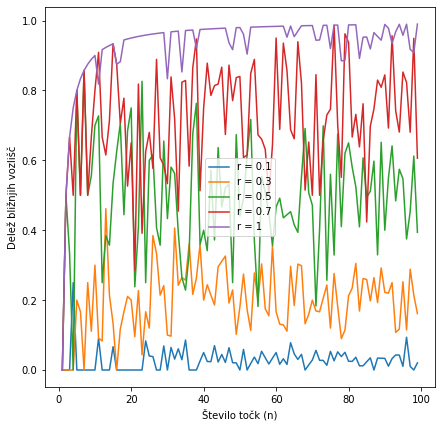

In [57]:
tocke0, dolzine0 = procent_bliznjih_tocke(100, 0.1)
tocke1, dolzine1 = procent_bliznjih_tocke(100, 0.3)
tocke2, dolzine2 = procent_bliznjih_tocke(100, 0.5)
tocke3, dolzine3 = procent_bliznjih_tocke(100, 0.7)
tocke4, dolzine4 = procent_bliznjih_tocke(100, 1)

plt.plot(tocke0, dolzine0, label='r = 0.1');
plt.plot(tocke1, dolzine1, label='r = 0.3');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.xlabel('Število točk (n)');
plt.ylabel('Delež bližnjih vozlišč');
plt.legend();

Dobili smo **graf odstotka bližnjih vozlišč v odvisnosti od števila točk**. 

 Opazimo, da vrednost parametra $r$ zelo vpliva na odstotek bližnjih vozlišč, medtem ko maksimalno število točk razen pri res majhnih vrednostih $n$-ja nima vpliva. Pri $r = 0.1$ je naše naključno vozlišče 'bližnje' samo z med $0$ in $10$ odstotki ostalih vozlišč. Pri $r = 1$ pa z med $80$ in $100$ odstotki. Ta ugotovitev se nam zdi logična, saj je v radiju dolžine $1$ oz naključne točke razumno večje število točk kakor v radiju dolžine $0.2$.


 **Sklep:** Večanje maksimalnega števila točk ne vpliva na odstotek bližnjih vozlišč, maksimalna razdalja ima pa velik vpliv.

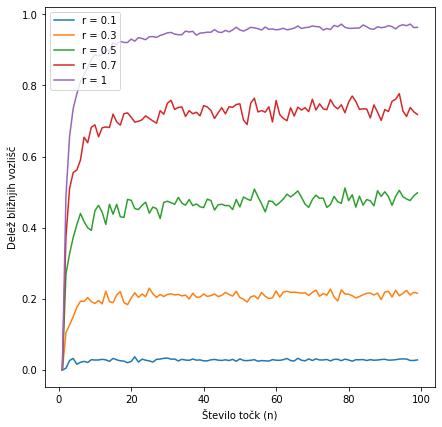

In [58]:
povp0 = []
povp1 = []
povp2 = []
povp3 = []
povp4 = []

for i in range(100):
    tocke0, procenti0 = procent_bliznjih_tocke(100, 0.1)
    tocke1, procenti1 = procent_bliznjih_tocke(100, 0.3)
    tocke2, procenti2 = procent_bliznjih_tocke(100, 0.5)
    tocke3, procenti3 = procent_bliznjih_tocke(100, 0.7)
    tocke4, procenti4 = procent_bliznjih_tocke(100, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(procenti0)
    povp1.append(procenti1)
    povp2.append(procenti2)
    povp3.append(procenti3)
    povp4.append(procenti4)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  
povp4 = [sum(izracun)/len(izracun) for izracun in zip(*povp4)] 

# narišemo
plt.plot(tocke0, povp0, label='r = 0.1');
plt.plot(tocke1, povp1, label='r = 0.3');
plt.plot(tocke2, povp2, label='r = 0.5');
plt.plot(tocke3, povp3, label='r = 0.7');
plt.plot(tocke4, povp4, label='r = 1');
plt.xlabel('Število točk (n)');
plt.ylabel('Delež bližnjih vozlišč');
plt.legend();

Po večkrat izvedenih in povprečenih izračunih vidimo, da dobljeni graf potrjuje naš zgornji sklep. Vrednost se ne spreminja za večje $n$, ker so točke izbrane glede na enakomerno porazdelitev; razmerje med točkami znotraj krožnice z radijem $r$ in zunaj nje, se zaradi tega ne spreminja.


<br>

### 2. Spreminja se maksimalna dovoljena razdalja ob danem številu točk:

V funkciji `procent_bliznjih_razdalja`  smo število točk $n$ vzeli za dano in gledali, kako se spreminja delež bliznjih vozlišč, ko spreminjamo največjo dovoljeno razdaljo od `min_razdalja` do `max_razdalja`. 

In [59]:

def procent_bliznjih_razdalja(st_tock, min_razdalja=0.1, max_razdalja=0.9, korak=0.005): 
    maxi = []
    procenti = []
    
    trenutna = min_razdalja
    while trenutna <= max_razdalja:
        a = Kvadrat(st_tock, trenutna)
        maxi.append(trenutna)
        
        opazovana = a.tocke[0]
        povezane = a.bliznje().get(opazovana)
        
        procenti.append(len(povezane) / len(a.tocke))
        
        trenutna += korak
        
    return maxi, procenti

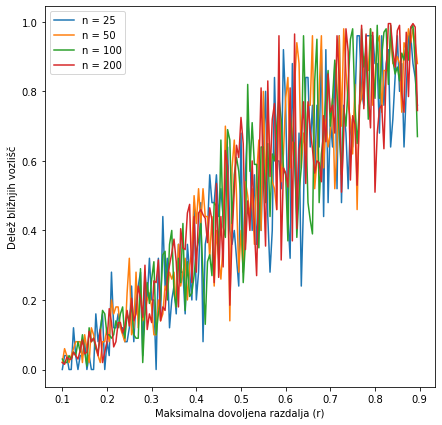

In [60]:
maxi0, procenti0 = procent_bliznjih_razdalja(25, 0.1, 0.9)
maxi1, procenti1 = procent_bliznjih_razdalja(50, 0.1, 0.9)
maxi2, procenti2 = procent_bliznjih_razdalja(100, 0.1, 0.9)
maxi3, procenti3 = procent_bliznjih_razdalja(200, 0.1, 0.9)

plt.plot(maxi0, procenti0, label='n = 25');
plt.plot(maxi1, procenti1, label='n = 50');
plt.plot(maxi2, procenti2, label='n = 100');
plt.plot(maxi3, procenti3, label='n = 200');
plt.xlabel('Maksimalna dovoljena razdalja (r)');
plt.ylabel('Delež bližnjih vozlišč');
plt.legend();

Dobimo **graf odstotka povezanih vozlišč v odvisnosti od maksimalne razdalje**. 

Vidimo da število vozlišč ne vpliva pretirano na odstotek bližnjih vozlišč z naključno izbranim vozliščem, saj so grafi za vse vrednosti $n$-ja konsistentni. Po drugi strani pa na našo preiskovano vrednost zelo vpliva maksimalna razdalja. Pri $r = 0.1$ je odstotek bližnjih vozlišč zelo majhen, do $10$ odstotkov. Pri $r= 0.9$ pa je  naključnemu vozlišču bližnjih od $60$ do $100$ odstotkov vseh ostalih vozlišč. 

**Sklep:** Z večanjem maksimalne razdalje se sorazmerno veča tudi odstotek bližnjih vozlišč z naključno izbranim vozliščem.

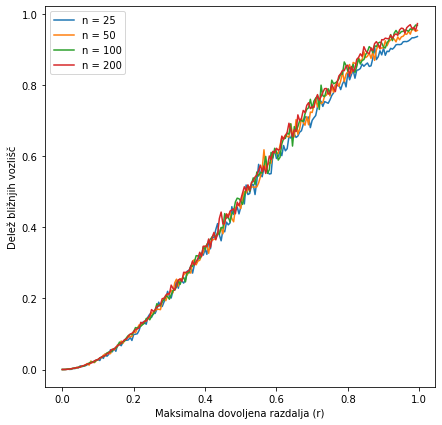

In [61]:
povp0 = []
povp1 = []
povp2 = []
povp3 = []

for i in range(100):
    tocke0, procenti0 = procent_bliznjih_razdalja(25, 0, 1)
    tocke1, procenti1 = procent_bliznjih_razdalja(50, 0, 1)
    tocke2, procenti2 = procent_bliznjih_razdalja(100, 0, 1)
    tocke3, procenti3 = procent_bliznjih_razdalja(200, 0, 1)
    
    
    povp0.append(procenti0)
    povp1.append(procenti1)
    povp2.append(procenti2)
    povp3.append(procenti3)
    

povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  


plt.plot(tocke0, povp0, label='n = 25');
plt.plot(tocke1, povp1, label='n = 50');
plt.plot(tocke2, povp2, label='n = 100');
plt.plot(tocke3, povp3, label='n = 200');
plt.xlabel('Maksimalna dovoljena razdalja (r)');
plt.ylabel('Delež bližnjih vozlišč');
plt.legend();

Z večimi izračuni, ki smo jih nato povprečili smo odpravili šum in dobili zgornji graf. Vidimo, da število točk res nima prav nobenega vpliva na delež bližnjih točk, naraščaje z $r$ pa se zdi skoraj linearno, a se pri velikih in malih vrednostih malo splošči.


<br>

### 3. Opazujemo spreminjanje obeh parametrov hkrati:

V 3D smo pogledali kako se spreminja delež bližnjih vozlišč, če spreminjamo maksimalno razdaljo in maksimalno število točk hkrati. Graf nazorno prikaže neodvisnost od $n$ in zgoraj opisano naraščanje z $r$.

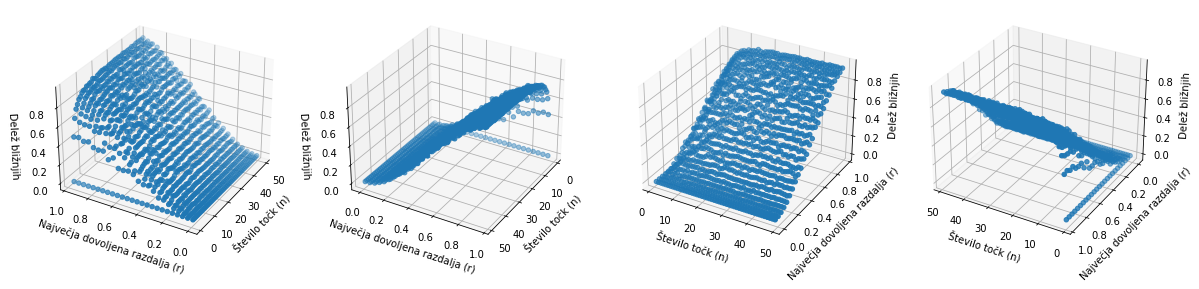

In [62]:
# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

korak = 0.04

povp = []

# spreminjamo število točk in kličemo zgornjo funkcijo
for i in range(100):
    # definiramo prazne sezname - to bodo koordinate točk
    nji = []
    maxiji = []
    dolzineji = []
    for n in range(1, 50):
        
        # izračunamo dolžine
        
        maxi, dolzine = procent_bliznjih_razdalja(n, 0, 1, korak)
        
        nji += [n for i in range(int(1/korak))]
        maxiji += maxi
        dolzineji += dolzine
        
    povp.append(dolzineji)
    
povp = [sum(izracun)/len(izracun) for izracun in zip(*povp)] 
    
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)

# s pomočjo funkcije subplot narišemo grafa enega ob drugem

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.view_init(30, 210)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Delež bližnjih')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.view_init(30, 30)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Delež bližnjih')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.view_init(30, 300)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Delež bližnjih')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.view_init(30, 120)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Delež bližnjih')
ax.scatter(nji, maxiji, povp);


<br>
<br>
<br>

## Delež povezanih vozlišč

Izberemo naključno vozlišče in gledamo, s kakšnim deležem ostalih vozlišč je to vozlišče povezano.

### 1. Spreminja se maksimalno število točk ob dani maksimalni dovoljeni razdalji:

Definirali smo funkcijo `procent_povezanih_tocke` v kateri maksimalno dovoljeno razdaljo $r$ vzamemo za dano in pogledamo, 
    kako se spreminja delež povezanih vozlišč z našim naključnim vozliščem, ko 
    imamo med eno in `max_st_tock` točk.

In [63]:
def procent_povezanih_tocke(max_st_tock, max_razdalja): 
    tocke = []
    procenti = []
    
    for i in range(1, max_st_tock):
        a = Kvadrat(i, max_razdalja)
        tocke.append(i)

        oddaljenost, _ = a.drevo_najkrajsih_poti()
        
        povezane = [t for t in oddaljenost if oddaljenost[t] < 1000000]
        
        procenti.append(len(povezane) / len(a.tocke))
        
    return tocke, procenti

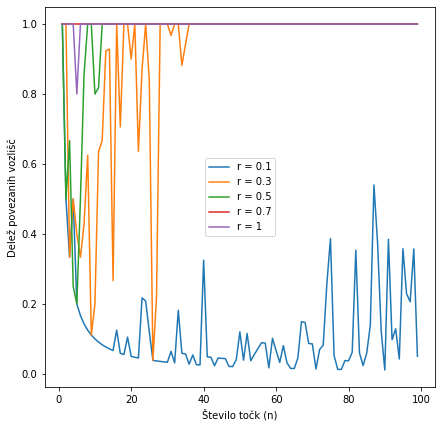

In [64]:
tocke0, dolzine0 = procent_povezanih_tocke(100, 0.1)
tocke1, dolzine1 = procent_povezanih_tocke(100, 0.3)
tocke2, dolzine2 = procent_povezanih_tocke(100, 0.5)
tocke3, dolzine3 = procent_povezanih_tocke(100, 0.7)
tocke4, dolzine4 = procent_povezanih_tocke(100, 1)

plt.plot(tocke0, dolzine0, label='r = 0.1');
plt.plot(tocke1, dolzine1, label='r = 0.3');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.xlabel('Število točk (n)');
plt.ylabel('Delež povezanih vozlišč');
plt.legend();

Dobili smo **graf odstotka povezanih vozlišč v odvisnosti od števila točk**. 

Parameter $r$ ključno vpliva na odstotek povezanih vozlišč. Pri $r = 1$ dobimo da je naše naključno vozlišče povezano z vsemi ostalimi ne glede na maksimalno število točk. Za dodatne sklepe pa je graf preveč nejasen.

 **Sklep:** Z večanjem maksimalnega števila točk se ne glede na vrednost maksimalne razdalje slej ko prej zgodi, da je naše naključno vozlišče povezano z vsemi ostalimi.


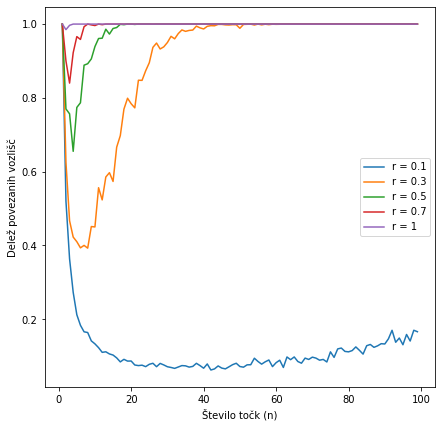

In [65]:
povp0 = []
povp1 = []
povp2 = []
povp3 = []
povp4 = []

for i in range(100):
    tocke0, procenti0 = procent_povezanih_tocke(100, 0.1)
    tocke1, procenti1 = procent_povezanih_tocke(100, 0.3)
    tocke2, procenti2 = procent_povezanih_tocke(100, 0.5)
    tocke3, procenti3 = procent_povezanih_tocke(100, 0.7)
    tocke4, procenti4 = procent_povezanih_tocke(100, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(procenti0)
    povp1.append(procenti1)
    povp2.append(procenti2)
    povp3.append(procenti3)
    povp4.append(procenti4)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  
povp4 = [sum(izracun)/len(izracun) for izracun in zip(*povp4)] 

# narišemo
plt.plot(tocke0, povp0, label='r = 0.1');
plt.plot(tocke1, povp1, label='r = 0.3');
plt.plot(tocke2, povp2, label='r = 0.5');
plt.plot(tocke3, povp3, label='r = 0.7');
plt.plot(tocke4, povp4, label='r = 1');
plt.xlabel('Število točk (n)');
plt.ylabel('Delež povezanih vozlišč');
plt.legend();

Po končanem povprečenju opazimo enotno vedenje za vse vrednosti $r$. Zdi se da res za dovolj veliko število točk pride do povezanosti med vsemi vozlišči, kar se zdi smiselno. 

Pri $r=0.1$ spet opazimo nenavadno vedenje, a po primerjavi z ostalimi primeri vidimo, da bi ponovno lahko pričakovali, da za dovolj veliko točk dobimo podobno vedenje. 


<br>

### 2. Spreminja se maksimalna dovoljena razdalja ob danem številu točk:

V funkciji `procent_povezanih_razdalja`  smo število točk $n$ vzeli za dano in gledali, kako se spreminja delež povezanih vozlišč, ko spreminjamo največjo dovoljeno razdaljo od `min_razdalja` do `max_razdalja`. 

In [66]:
def procent_povezanih_razdalja(st_tock, min_razdalja=0.1, max_razdalja=0.9, korak=0.005): 
    maxi = []
    procenti = []
    
    trenutna = min_razdalja
    while trenutna <= max_razdalja:
        a = Kvadrat(st_tock, trenutna)
        maxi.append(trenutna)
        
        oddaljenost, _ = a.drevo_najkrajsih_poti()
        
        povezane = [t for t in oddaljenost if oddaljenost[t] < 1000000]
        
        procenti.append(len(povezane) / len(a.tocke))
        
        trenutna += korak
        
    return maxi, procenti

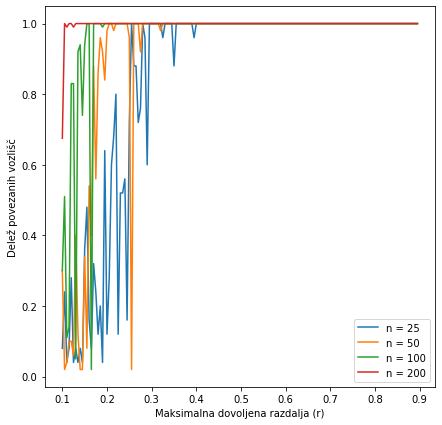

In [67]:
maxi0, dolzine0 = procent_povezanih_razdalja(25)
maxi1, dolzine1 = procent_povezanih_razdalja(50)
maxi2, dolzine2 = procent_povezanih_razdalja(100)
maxi3, dolzine3 = procent_povezanih_razdalja(200)

plt.plot(maxi0, dolzine0, label='n = 25');
plt.plot(maxi1, dolzine1, label='n = 50');
plt.plot(maxi2, dolzine2, label='n = 100');
plt.plot(maxi3, dolzine3, label='n = 200');
plt.xlabel('Maksimalna dovoljena razdalja (r)');
plt.ylabel('Delež povezanih vozlišč');
plt.legend();

Dobimo **graf odstotka povezanih vozlišč v odvisnosti od maksimalne razdalje**. 

Odstotek povezanih vozlišč pri majhnih vrednostih $r$-ja niha med $0$ in $100$ odstotki. Za ostale vrednosti vidimo, da je naše naključno vozlišče povezano z vsemi ostalimi, ne glede na maksimalno razdaljo ali maksimalno število točk.

**Sklep:** Z povečevanjem maksimalne dovoljene razdalje in maksimalnega števila točk sčasoma vedno pridemo do situacije, ko so povezana vsa vozlišča.

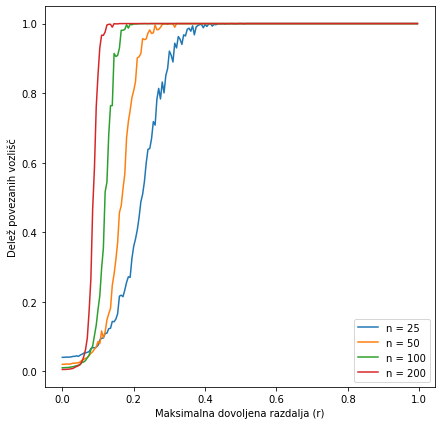

In [68]:
povp0 = []
povp1 = []
povp2 = []
povp3 = []

for i in range(100):
    tocke0, procenti0 = procent_povezanih_razdalja(25, 0, 1)
    tocke1, procenti1 = procent_povezanih_razdalja(50, 0, 1)
    tocke2, procenti2 = procent_povezanih_razdalja(100, 0, 1)
    tocke3, procenti3 = procent_povezanih_razdalja(200, 0, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(procenti0)
    povp1.append(procenti1)
    povp2.append(procenti2)
    povp3.append(procenti3)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  

# narišemo
plt.plot(tocke0, povp0, label='n = 25');
plt.plot(tocke1, povp1, label='n = 50');
plt.plot(tocke2, povp2, label='n = 100');
plt.plot(tocke3, povp3, label='n = 200');
plt.xlabel('Maksimalna dovoljena razdalja (r)');
plt.ylabel('Delež povezanih vozlišč');
plt.legend();

Po povprečenju se nam pokaže lepa struktura, ki potrjuje originalna ugibanja. Sedaj tudi vidimo, da potrebujemo večji $r$, da dosežemo polno povezanost za manjše $n$.


<br>

### 3. Opazujemo spreminjanje obeh parametrov hkrati:

V 3D smo pogledali kako se spreminja delež povezanih vozlišč, če spreminjamo maksimalno razdaljo in maksimalno število točk hkrati. Dobili smo nasldenji graf:

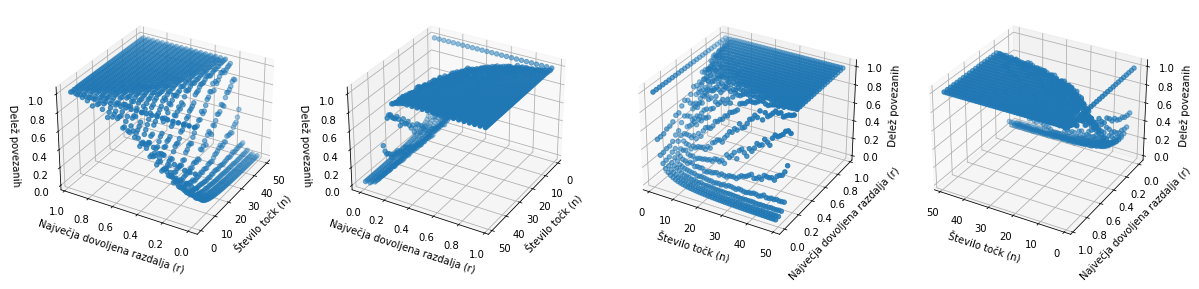

In [69]:
# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

korak = 0.04

povp = []

# spreminjamo število točk in kličemo zgornjo funkcijo
for i in range(100):
    # definiramo prazne sezname - to bodo koordinate točk
    nji = []
    maxiji = []
    dolzineji = []
    for n in range(1, 50):
        
        # izračunamo dolžine
        
        maxi, dolzine = procent_povezanih_razdalja(n, 0, 1, korak)
        
        nji += [n for i in range(int(1/korak))]
        maxiji += maxi
        dolzineji += dolzine
        
    povp.append(dolzineji)
    
povp = [sum(izracun)/len(izracun) for izracun in zip(*povp)] 
    
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)

# s pomočjo funkcije subplot narišemo grafa enega ob drugem

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.view_init(30, 210)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Delež povezanih')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.view_init(30, 30)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Delež povezanih')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.view_init(30, 300)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Delež povezanih')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.view_init(30, 120)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Delež povezanih')
ax.scatter(nji, maxiji, povp);

## Zaključek


Izračuni v projektni nalogi, iz katerih smo nato dobili videne grafe, so bili časovno zelo zamudni. Kar nekaj grafov je za izris potrebovalo od $5$ do $15$ minut. Ker pa smo v veliko primerih pri našem izračunu opazili šum, smo izračune izvedli večkrat in jih povprečili. Tako smo dobili bolj nazorne rezultate, ki so v večini primerov potrdili naš sklep. Za izris vsakega od teh grafov je računalnik potreboval približno $40$ min, so pa spremenili naše sklepe iz ugibanj v bolj utemeljene razmisleke. Sklepe smo vseeno po večini pustili kot dvostopenjske razmisleke: najprej "ugibanje" iz šuma in potem potrditev iz povprečenih grafov.

Kar pri nekaj opravljenih izračunih smo opazili zelo veliko odstopanje grafa pri vrednosti $r = 0.1$. Eno najbolj izrazitih je bilo pri izračunu vsote dolžin od korena do ostalih v primeru, ko se spreminja maksimalno število točk ob dani maksimalni dovoljeni razdalji. Izkazalo se je, da je za to odstopanje res krivo premajhno maksimalno število točk, ki je bilo v omenjenem primeru enako $100$. Če za `max_st_tock` vzamemo $250$ dobimo spodnji graf, iz katerega je razvidno, da se pri večjem številu maksimalnih točk tudi graf za $r = 0.1$ obnaša podobno kakor grafi pri drugih vrednostih maksimalne razdalje. Razlog zakaj pri vseh grafih nismo uporabili večjega maksimalnega števila točk in tako zmanjšali napake dobljenih ugotovitev je bila časovna zahtevnost. Kot omenjeno je bil porabljen čas za izračun in izris grafa že pri $n = 100$ zelo dolg in naju je oviral pri tekočem delu na projektu.

In [ ]:

povp0 = []
povp1 = []

for i in range(20):
    tocke0, dolzine0 = vsota_razdalj_tocke(250, 0.1)
    tocke1, dolzine1 = vsota_razdalj_tocke(250, 0.9)
    
    # gradimo matriko vseh izračunov
    povp0.append(dolzine0)
    povp1.append(dolzine1)

# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 

# narišemo
plt.plot(tocke0, povp0, label='r = 0.1');
plt.plot(tocke1, povp1, label='r = 0.9');
plt.xlabel('Število točk (n)');
plt.ylabel('Vsota razdalj');
plt.legend();